In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_excel('4.xlsx')
df

,name,age,visits_quantity,price,category
0,Эмских Зиновий Мечиславович,27,7,30000,Бытовая техника
1,Бенедиктов Борис Ульянович,40,42,3900,Смартфоны
2,Алеева Татьяна Родионовна,18,13,4600,ТВ
3,Низова Эмилия Иларионовна,30,27,2900,Развлечения
4,Юрьев Гавриил Трофимович,19,12,2100,Компьютеры и комплектующие
...,...,...,...,...,...
695,Низовский Никита Онуфриевич,38,26,3400,Услуги
696,Чупрова Светлана Игоревна,63,3,3400,Аксессуары
697,Шапиро Изольда Ипполитовна,41,9,3200,Бытовая техника
698,Шеин Даниил Гордеевич,34,35,600,Смартфоны


In [37]:
df['sex'] = df.name.apply(lambda x: x[-1])
df.loc[df.sex == 'ч', 'sex'] = 'male'
df.loc[df.sex == 'а', 'sex']= 'female'
df

,name,age,visits_quantity,price,category,sex
0,Эмских Зиновий Мечиславович,27,7,30000,Бытовая техника,male
1,Бенедиктов Борис Ульянович,40,42,3900,Смартфоны,male
2,Алеева Татьяна Родионовна,18,13,4600,ТВ,female
3,Низова Эмилия Иларионовна,30,27,2900,Развлечения,female
4,Юрьев Гавриил Трофимович,19,12,2100,Компьютеры и комплектующие,male
...,...,...,...,...,...,...
695,Низовский Никита Онуфриевич,38,26,3400,Услуги,male
696,Чупрова Светлана Игоревна,63,3,3400,Аксессуары,female
697,Шапиро Изольда Ипполитовна,41,9,3200,Бытовая техника,female
698,Шеин Даниил Гордеевич,34,35,600,Смартфоны,male


In [77]:
df['age_round'] = df.age.apply(lambda x: round(x/10)*10)
df

,name,age,visits_quantity,price,category,sex,age_round
0,Эмских Зиновий Мечиславович,27,7,30000,Бытовая техника,male,30
1,Бенедиктов Борис Ульянович,40,42,3900,Смартфоны,male,40
2,Алеева Татьяна Родионовна,18,13,4600,ТВ,female,20
3,Низова Эмилия Иларионовна,30,27,2900,Развлечения,female,30
4,Юрьев Гавриил Трофимович,19,12,2100,Компьютеры и комплектующие,male,20
...,...,...,...,...,...,...,...
695,Низовский Никита Онуфриевич,38,26,3400,Услуги,male,40
696,Чупрова Светлана Игоревна,63,3,3400,Аксессуары,female,60
697,Шапиро Изольда Ипполитовна,41,9,3200,Бытовая техника,female,40
698,Шеин Даниил Гордеевич,34,35,600,Смартфоны,male,30


In [57]:
male_df = df[df.sex == 'male']
female_df = df[df.sex == 'female']

In [38]:
male_quantity = male_df.shape[0] # Количество мужчин
male_quantity

337

In [82]:
female_quantity = female_df.shape[0] # Количество женщин
female_quantity

363

In [88]:
male_sum_mean = np.mean(df[df.sex == 'male']['price']) - 30000 / 336 # Средний чек среди мужчин
male_sum_mean

2656.708350996185

In [43]:
female_sum_mean = np.mean(df[df.sex == 'female']['price']) # Средний чек среди женщин
female_sum_mean

2487.052341597796

<AxesSubplot:xlabel='visits_quantity', ylabel='price'>

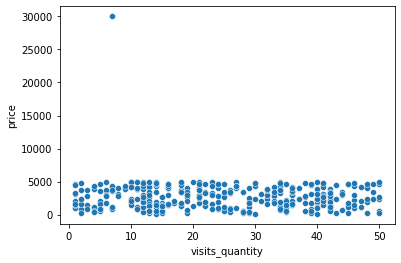

In [50]:
sns.scatterplot(x=df.visits_quantity, y=df.price)

<AxesSubplot:xlabel='category', ylabel='age'>

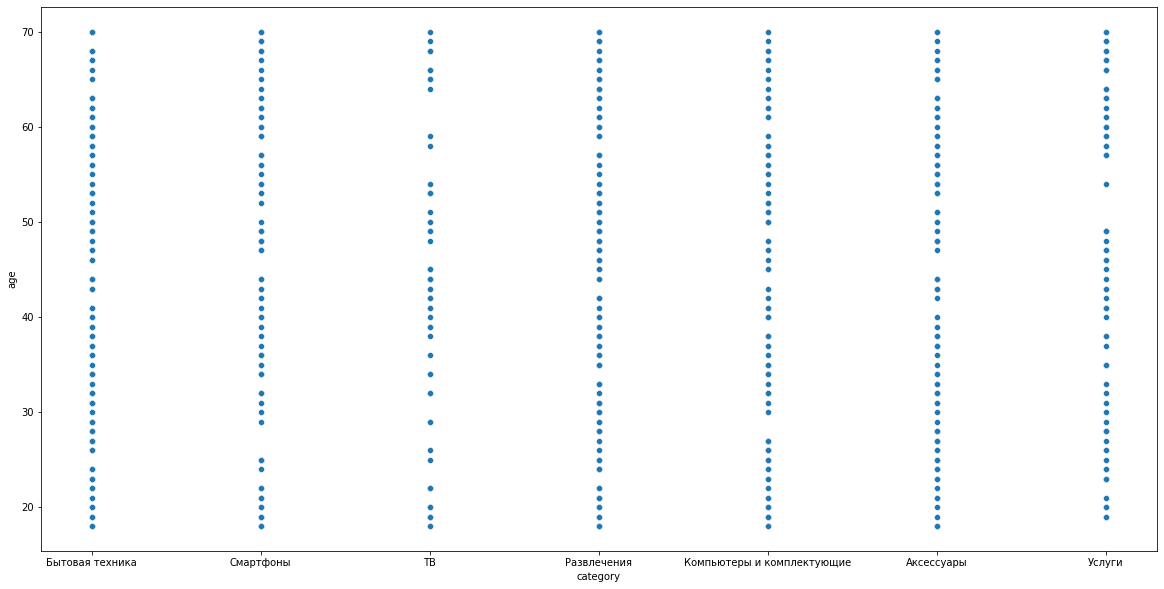

In [87]:
plt.figure(figsize=[20,10])
sns.scatterplot(x=df.category, y=df.age)

In [95]:
proceeds_df = df.groupby('sex', as_index=False).agg({'price': 'sum'}).rename(columns={'price': 'proceeds'})
proceeds_df

,sex,proceeds
0,female,902800
1,male,925400


<AxesSubplot:xlabel='sex', ylabel='proceeds'>

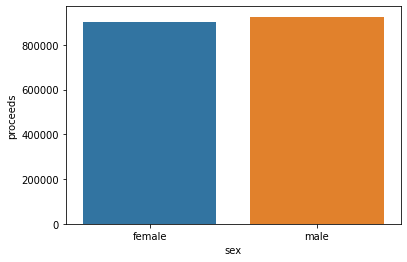

In [96]:
sns.barplot(x='sex', y='proceeds', data=proceeds_df)

In [98]:
categories_df = male_df.groupby('category', as_index=False).agg({'price': 'mean', 'age': 'mean', 'visits_quantity': 'mean'})
categories_df

,category,price,age,visits_quantity
0,Аксессуары,2802.127660,42.510638,25.446809
1,Бытовая техника,3182.000000,44.540000,22.800000
2,Компьютеры и комплектующие,2846.511628,40.976744,26.674419
3,Развлечения,2654.411765,40.676471,24.117647
4,Смартфоны,2500.000000,45.851064,23.829787
5,ТВ,2916.666667,46.055556,21.833333
6,Услуги,2373.913043,45.413043,25.565217


<AxesSubplot:xlabel='category', ylabel='visits_quantity'>

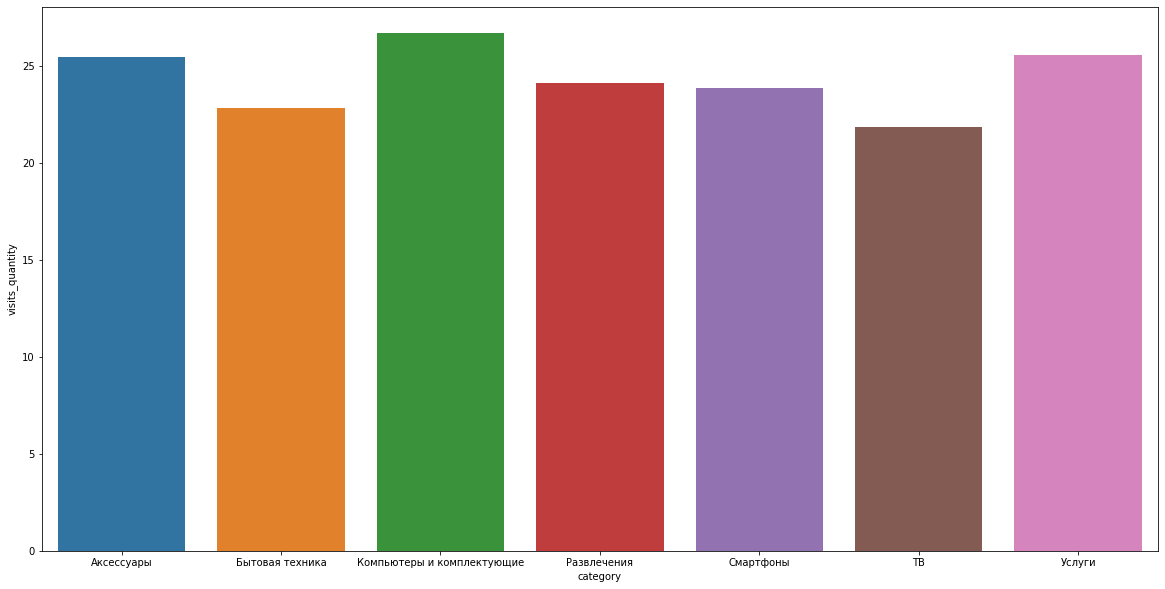

In [100]:
plt.figure(figsize=[20,10])
sns.barplot(x='category', y='visits_quantity', data=categories_df)

<AxesSubplot:xlabel='age_round', ylabel='category'>

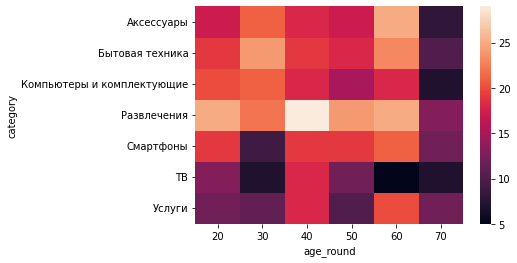

In [106]:
sns.heatmap(df.groupby(['category', 'age_round'], as_index=False).agg({'price': 'count'}) \
  .pivot(index='category', columns='age_round', values='price'))

In [78]:
df.groupby('age_round').agg({'price': 'sum'})

,price
age_round,
20,325100
30,323000
40,366400
50,287600
60,362800
70,163300
